In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from matplotlib_venn import venn3, venn3_circles

In [2]:
ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")

In [3]:
BrainSpan = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/expression_matrix.csv",
                   delimiter=",", header = None, names=None)
BrainSpan.head(2)
BrainSpan_rowmeta = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/rows_metadata.csv",
                               delimiter=",")
Brain_expressed_genes = []
Brain_expressed_exps = []
for i, row in BrainSpan.iterrows():
    try:
        entrez_id = int(BrainSpan_rowmeta.loc[i, "entrez_id"])
    except:
        continue
    avg_exp = np.mean(row[1:])
    if avg_exp > 1:
        Brain_expressed_genes.append(entrez_id)
        Brain_expressed_exps.append(avg_exp)
new_df = pd.DataFrame(data={"genes":Brain_expressed_genes, "exp":Brain_expressed_exps})
mouse_genes = [int(x.strip()) for x in open("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt",
                              'rt')]
new_df = new_df[new_df["genes"].isin(mouse_genes)]
brain_exp_genes = new_df["genes"].values

In [5]:
print(len(brain_exp_genes))

11391


In [6]:
brain_exp_genes[:10]

array([ 7105,  8813, 57147,  2268,  3075,  2519,  2729,  4800, 90529,
       57185])

In [8]:
with open("/Users/jiayao/Work/ASD_Circuits/dat/genes/brainspan_express.txt", "wt") as f:
    for g in brain_exp_genes:
        f.write(str(g)+"\n")

In [4]:
asd_ssc = loadgenelist("../dat/genes/asd.ssc.entrez.list")
asd_spark = loadgenelist("../dat/genes/asd.spark.entrez.list")

In [4]:
jon_ssc = loadgenelist("../dat/genes/Jon.ssc.txt")
jon_spark = loadgenelist("../dat/genes/Jon.spark.txt")
jon_tada = loadgenelist("../dat/genes/Jon.tada.txt")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

In [9]:
print(jon_ssc)
print(len(jon_ssc))

[29123, 10438, 1826, 4297, 8295, 55870, 57680, 2904, 23389, 6326, 287, 1106, 4851, 23135, 2194, 463, 6711, 27086, 23001, 23499, 7204, 53335, 57492, 8831, 7994, 1859, 10787, 57451, 9578, 79633, 4041, 23654, 2200, 51322, 84629, 58508, 23199, 26960, 58499, 22859, 493901, 6683, 22941, 8085, 57634, 80816, 10716, 23524, 51366, 27245, 10847, 5728, 84444, 5253, 28514, 9994, 9969, 4627, 5430, 23036, 6710, 55777, 55636, 23112, 26057, 7249, 57453, 9620, 283450, 23469, 6305, 2975, 23126, 64207, 2033, 6323, 25831, 23394, 23405, 84181, 4849, 3897, 26011, 26058, 1956, 9378, 25942, 394, 3608, 26046, 6651, 7468, 9898, 777, 1938, 2901, 9901, 23152, 23030, 9020, 11083, 5361, 23352, 8912, 85445, 7874, 9044, 112939, 5980, 23013, 9228, 9024, 152789, 116931, 7477, 1387, 29, 4739, 6601, 26130, 23185, 23347, 64784, 293, 56995, 1778, 23774, 5990, 26050, 64324, 23179, 23451, 253461, 9950, 5126, 55209, 23025, 8452, 85358, 57198, 10522, 8924, 89797, 23040, 83439, 2737, 26512, 5133, 286046, 2047, 64848, 57556, 6874

In [5]:
jon_ssc_m = list(set(jon_ssc).intersection(set(allen_mouse_genes)))
jon_spark_m = list(set(jon_spark).intersection(set(allen_mouse_genes)))
jon_tada_m = list(set(jon_tada).intersection(set(allen_mouse_genes)))

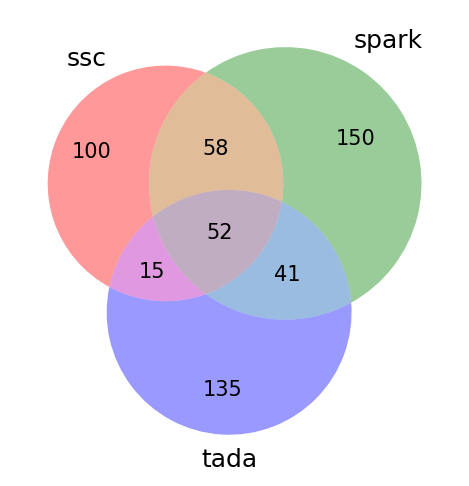

In [56]:
plt.figure(dpi=150)
v = venn3([set(jon_ssc_m), set(jon_spark_m), set(jon_tada_m)], 
      set_labels = ('ssc', 'spark', 'tada'))

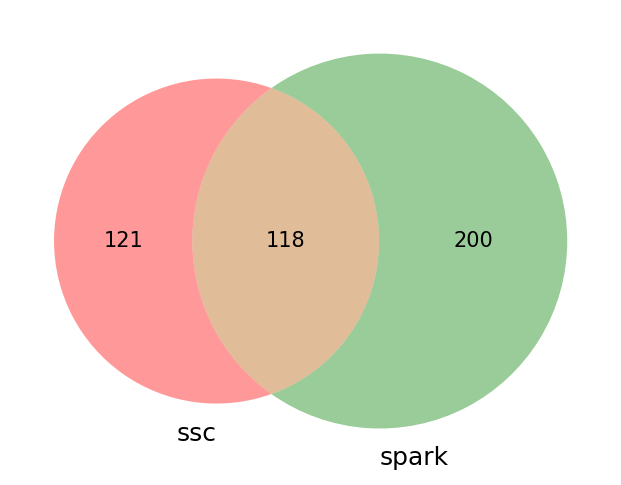

In [49]:
plt.figure(dpi=150)
v = venn2([set(jon_ssc), set(jon_spark)], 
      set_labels = ('ssc', 'spark'))

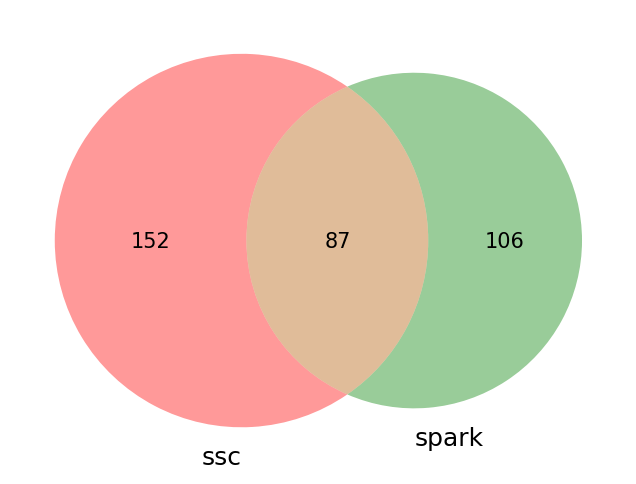

In [5]:
from matplotlib_venn import venn2, venn2_circles
plt.figure(dpi=150)
v = venn2([set(asd_ssc), set(asd_spark)], 
      set_labels = ('ssc', 'spark'))

In [47]:
62 + 56 + 41 + 159

318

In [6]:
ssc_strs = QuantileAVGScoring(ExpZscoreMat, jon_ssc_m)
spark_strs = QuantileAVGScoring(ExpZscoreMat, jon_spark_m)

In [7]:
ssc_strs

,STR,Bias
40,Dentate_gyrus,0.634667
13,Accessory_olfactory_bulb,0.619356
75,Lateral_posterior_nucleus_of_the_thalamus,0.613261
26,Field_CA3,0.609624
24,Field_CA1,0.606706
...,...,...
195,Motor_nucleus_of_trigeminal,0.405575
152,Nucleus_raphe_magnus,0.402553
82,Magnocellular_reticular_nucleus,0.398087
197,Ventral_cochlear_nucleus,0.387731


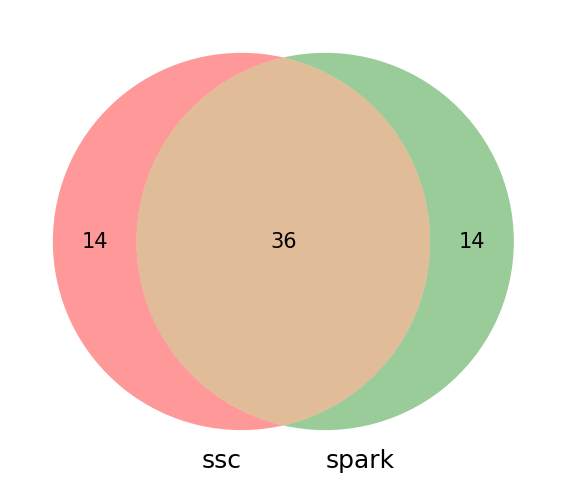

In [59]:
from matplotlib_venn import venn2, venn2_circles
plt.figure(dpi=150)
v = venn2([set(ssc_strs["STR"].values[:50]), set(spark_strs["STR"].values[:50])], 
      set_labels = ('ssc', 'spark'))

In [60]:
overlaps = []
for i in range(1000):
    xx1 = np.random.choice(brain_exp_genes, 118)
    xx2 = np.random.choice(brain_exp_genes, 121)
    xx3 = np.random.choice(brain_exp_genes, 200)
    set1 = np.concatenate((xx1, xx2))
    set2 = np.concatenate((xx1, xx3))
    set1_strs = QuantileAVGScoring(ExpZscoreMat, set1)
    set2_strs = QuantileAVGScoring(ExpZscoreMat, set2)
    str_overlap = len(set(set1_strs["STR"].values[:50]).intersection(set(set2_strs["STR"].values[:50])))
    overlaps.append(str_overlap)

(array([  9.,  14.,  74., 118., 182., 304., 147., 121.,  25.,   6.]),
 array([ 7. , 10.4, 13.8, 17.2, 20.6, 24. , 27.4, 30.8, 34.2, 37.6, 41. ]),
 <a list of 10 Patch objects>)

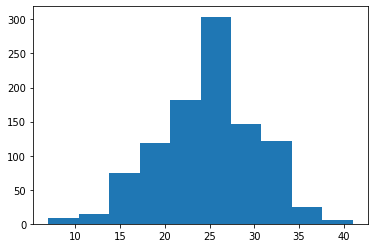

In [ ]:
plt.hist(overlaps)

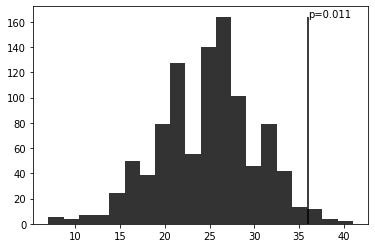

In [63]:
PlotPermutationP(overlaps, 36)